# Introdução a Ciência de Dados:

# Projeto: Classificação

Lua Nardi Quito (11371270)

### Exercício 1

In [1]:
#metodo bayesiano parametrico

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42) # define the seed 

data = pd.read_csv('data/cereal.csv', header=(0))
#usei o dataset cereal do kaggle (prever classe H ou C)

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  
attributes = list(data.columns)

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

#padronizacao
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.8 # fracao de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

from scipy.stats import multivariate_normal

#matrix to store the probabilities
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 

Pc = np.zeros(len(classes)) #fraction of elements in each class
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = x_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0,x_test.shape[0]):
        x = x_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

from sklearn.metrics import accuracy_score
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.6835748497617942


In [4]:
#metodo bayesiano nao-parametrico

from sklearn.neighbors import KernelDensity

jota = pd.read_csv('data/cereal.csv', header=(0))
#usei o dataset cereal do kaggle (prever classe H ou C)

classes = np.array(pd.unique(jota[jota.columns[-1]]), dtype=str)  

# Converte para matriz e vetor do numpy
jota = jota.to_numpy()
nrow,ncol = jota.shape
y = jota[:,-1]
X = jota[:,0:ncol-1]

# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.8 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]
        
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.6731051012352942


In [9]:
#metodo naive bayes

from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('data/cereal.csv', header=(0))

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.8 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

# ajusta o classificador Naive-Bayes de acordo com os dados
model = GaussianNB()
model.fit(X_train, y_train)
# realiza a predicao
y_pred = model.predict(X_test)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.7090968190163934


###Exercício 2

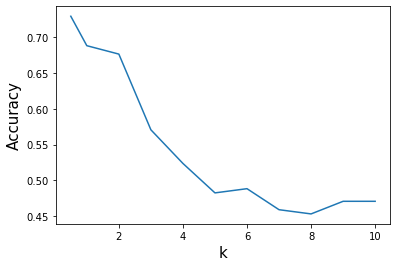

melhor k : 0.5


In [36]:
jota = pd.read_csv('cereal.csv', header=(0))
classes = np.array(pd.unique(jota[jota.columns[-1]]), dtype=str)  
jota = jota.to_numpy()
nrow,ncol = jota.shape
y = jota[:,-1]
X = jota[:,0:ncol-1]
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
p = 0.8 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes))

#mesmo codigo de antes so q variamos o valor do hiperparametro h
acc = []
hs = [0.5,1,2,3,4,5,6,7,8,9,10]
for h in hs:
    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(y_train == classes[i])) 
        Pc[i] = len(elements)/len(y_train)
        Z = x_train[elements,:][0] 
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
        for j in np.arange(0,x_test.shape[0]):
            x = x_test[j,:]
            x = x.reshape((1,len(x)))
            pj = np.exp(kde.score_samples(x)) 
            P[classes[i]][j] = pj*Pc[i]
    y_pred = []
    for i in np.arange(0, x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred, dtype=str)
    score = accuracy_score(y_pred, y_test)
    acc.append(score)

plt.figure(figsize=(6,4))
plt.plot(hs, acc)
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
print("melhor k :", min(hs))

###Exercício 3

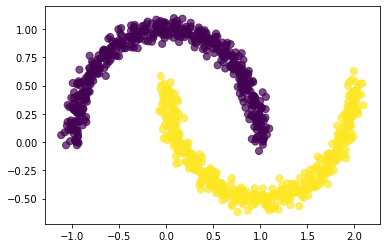

            X         Y  c
0   -0.736802  0.730926  0
1    0.801113  0.787569  0
2    1.637541 -0.268605  1
3    0.209356 -0.066082  1
4   -0.009949  0.434229  1
5   -0.887648  0.422436  0
6    2.015732  0.451030  1
7    0.001933  0.466325  1
8    1.510301 -0.418615  1
9    0.090446  0.269717  1
10   0.065992  0.210197  1
11  -0.631234  0.720381  0
12  -0.045767  0.337631  1
13   0.808929  0.548389  0
14   1.892162  0.047322  1
15   1.536950 -0.397520  1
16   2.026426  0.293838  1
17   1.337834 -0.384917  1
18   0.356760  0.956395  0
19  -0.243311  1.023589  0
20   0.653131  0.779554  0
21   0.524353 -0.300231  1
22   0.622756 -0.436942  1
23   0.271713 -0.130294  1
24   0.696358 -0.319729  1
25  -0.997330  0.308813  0
26   1.952691  0.320195  1
27   0.438897  0.908407  0
28  -0.411925  0.931276  0
29   0.712185  0.643266  0
..        ...       ... ..
970 -0.711849  0.654330  0
971  1.475894 -0.270255  1
972  0.436611 -0.299136  1
973  0.389430 -0.280491  1
974  0.912386  0.230966  0
9

In [5]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=0.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)
#colocando os dados em um dataframe
df = pd.DataFrame(data[0], columns=["X", "Y"])
cl = pd.DataFrame(data[1], columns=["c"])
data = pd.concat([df, cl], axis=1, sort=False)
print(data)
#'c' eh a classe (amarelo ou roxo)

In [6]:
#utilizando naive bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
p = 0.8 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.865


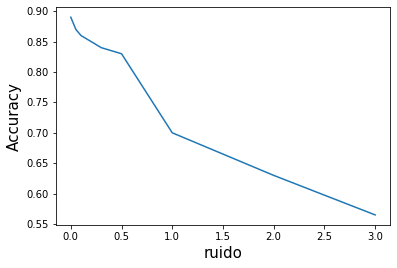

In [14]:
#agora variando o ruido (nao fiz com os 3 classificadores ao mesmo tempo pq tava dando problema)
ac = []
n_samples = 1000
L = [0,0.05,0.1,0.2,0.3,0.5,1,2,3]
for i in L: #variar o ruido nesses valores
    data  = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    df = pd.DataFrame(data[0], columns=["X", "Y"])
    cl = pd.DataFrame(data[1], columns=["c"])
    data = pd.concat([df, cl], axis=1, sort=False)
    classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  
    data = data.to_numpy()
    nrow,ncol = data.shape
    y = data[:,-1]
    X = data[:,0:ncol-1]
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    p = 0.8 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    ac.append(score)

plt.figure(figsize=(6,4))
plt.plot(L, ac)
plt.xlabel('ruido', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)

###Exercício 4

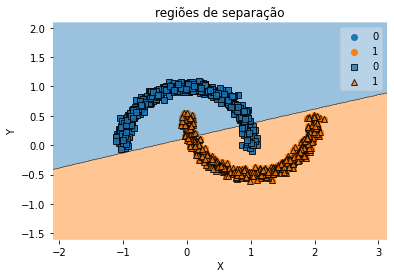

In [37]:
#regioes de separacao utilizando o naive bayes

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB
n_samples = 1000
centers = [(-4, 0), (0, 0), (3, 3)]
X, y = skdata.make_moons(n_samples=n_samples, noise=0.05)
# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], label = c)
    aux = aux + 1
# Training a classifier
model = GaussianNB()
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('regiões de separação')
plt.show()

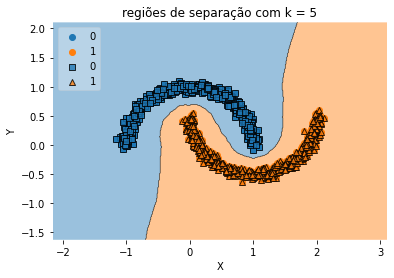

In [43]:
#regioes de separacao usando o metodo k-vizinhos

n_samples = 1000
centers = [(-4, 0), (0, 0), (3, 3)]
X, y = skdata.make_moons(n_samples=n_samples, noise=0.05)
# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], label = c)
    aux = aux + 1
plt.savefig('knn_ex.eps')
plt.legend()
k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X, y)   
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('regiões de separação com k = '+str(k))
plt.show()

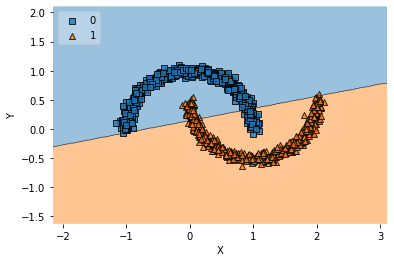

In [44]:
#regioes de separacao usando regressao logistica

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

###Exercício 5

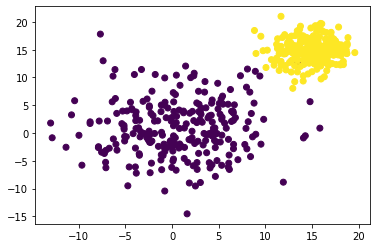

             X          Y  c
0    15.935392  12.065262  1
1    15.925234  14.004460  1
2    11.677083  21.003729  1
3     6.582349  -2.812952  0
4    16.320017  10.126062  1
5     4.306110   1.979739  0
6    13.206274  17.541888  1
7    15.516498  12.543914  1
8    15.800094  17.346830  1
9    -6.124736  11.426141  0
10   16.735472  15.196998  1
11    5.456155   5.200658  0
12   11.825439  17.193727  1
13   15.843088   0.886548  0
14   17.601264  12.325482  1
15   14.222050  13.868406  1
16   11.298013  15.207472  1
17   -0.029721   2.796775  0
18   15.664011  15.831782  1
19    6.563949   3.614527  0
20   -5.304645   3.958204  0
21    2.843153  -3.651110  0
22   16.281540  15.321096  1
23   -2.266665   3.539901  0
24   -0.093300   2.157965  0
25   14.546485  15.819975  1
26   -0.873042  -1.991263  0
27   13.667557  14.635995  1
28    9.819814   2.471130  0
29    8.018329  -2.835863  0
..         ...        ... ..
470   2.137853   0.331611  0
471  12.706208  16.293593  1
472   0.481013

In [14]:
from sklearn.datasets import make_blobs
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#visualizando os dados e os colocando em um dataframe
n = 500
c = [(1,1), (15,15)] 
std = [5.0, 2] 
nc = [400,50] 
X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std,centers= c)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show(True)

df = pd.DataFrame(X, columns=["X", "Y"])
cl = pd.DataFrame(y, columns=["c"])
data = pd.concat([df, cl], axis=1, sort=False)
print(data)

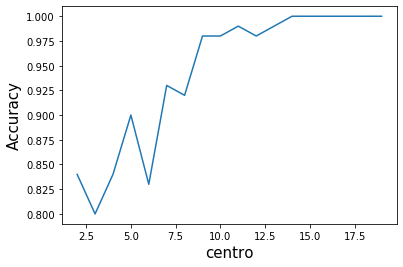

In [26]:
#variar a distancia entre os grupos e ver como isso afeta a acuracia
v = []
for j in range(2,20):
    v.append(j)
acc = []

for i in v:
    n = 500
    c = [(1,1), (i,i)] #vamos variar o valor da posicao do centro de uma das classes
    std = [5.0, 2] 
    nc = [400,50] 
    X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std,centers= c)
    df = pd.DataFrame(X, columns=["X", "Y"])
    cl = pd.DataFrame(y, columns=["c"])
    data = pd.concat([df, cl], axis=1, sort=False)
    classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  
    data = data.to_numpy()
    nrow,ncol = data.shape
    y = data[:,-1]
    X = data[:,0:ncol-1]
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    p = 0.8 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    acc.append(score)
plt.figure(figsize=(6,4))
plt.plot(v, acc)
plt.xlabel('centro', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)

###Exercício 6

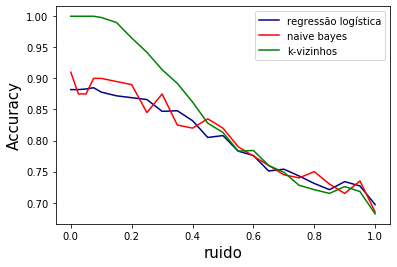

In [27]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

a = [] #armazena acuracia da regressao logistica
ac = [] #armazena acuracia do naive bayes
vscore = [] #armazena acuracia do k-vizinhos
k = 17 #esse era o melhor valor para k apos feito testes
n_samples = 1000
L = [0,0.025,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
for i in L: #variar o ruido nesses valores
    data  = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    df = pd.DataFrame(data[0], columns=["X", "Y"])
    cl = pd.DataFrame(data[1], columns=["c"])
    data = pd.concat([df, cl], axis=1, sort=False)
    classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  
    data = data.to_numpy()
    nrow,ncol = data.shape
    y = data[:,-1]
    X = data[:,0:ncol-1]
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    p = 0.8 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    ac.append(score)
    mmodel = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
    model.fit(X, y)
    p = model.predict_proba(X)
    a.append(model.score(X, y))
    odel = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(odel, X, y, cv=nkf)
    vscore.append(cv['test_score'].mean()) 

plt.figure(figsize=(6,4))
plt.plot(L, a, color='darkblue', label = "regressão logística")
plt.plot(L, ac, color='red', label = "naive bayes")
plt.plot(L, vscore, color='green', label = "k-vizinhos")
plt.legend()
plt.xlabel('ruido', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)